In [1]:
import os
import sys
from fast_mail_parser import parse_email, ParseError

emails = []

for arq in os.listdir("emails"):
    with open(f"emails/{arq}", "r") as f:
        message_payload = f.read()

    try:
        email = parse_email(message_payload)
    except ParseError as e:
        print("Failed to parse email: ", e)
        sys.exit(1)

    emails.append(email)

In [2]:
from bs4 import BeautifulSoup

datas = []

for email in emails:
    soup = BeautifulSoup(email.text_html[0], "html.parser")

    for td in soup.find_all("td"):
        if td.get("title"):
            datas.append(td.get("title"))

In [97]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://fonts.googleapis.com/css2?family=Open+Sans:ital,wght@0,300;0,400;0,600;0,700;0,800;1,300;1,400;1,600;1,700;1,800&amp;display=swap" rel="stylesheet"/>
 </head>
 <body style="min-width: 320px; max-width: 600px; margin: 0 auto; padding: 0; font-size: 14px;font-family: 'Open Sans', sans-serif; background-color: #FFFFFF;">
  <div style="border-collapse: collapse;display: grid;width: 100%; margin: 0 auto; padding: 0; background: #227F89;
    background: -moz-linear-gradient(left,  #227F89 0%, #4AC69C 100%);
    background: -webkit-linear-gradient(left,  #227F89 0%,#4AC69C 100%);
    background: linear-gradient(to right,  #227F89 0%,#4AC69C 100%);
    filter: progid:DXImageTransform.Microsoft.gradient( startColorstr='#227F89', endColorstr='#4AC69C',GradientType=1 );">
   <di

In [3]:
datahora = {}
for data in datas:
    separado = data.split(" ")
    if separado[0] in datahora:
        datahora[separado[0]] += [separado[1]]
    else:
        datahora[separado[0]] = [separado[1]]

datahora

{'23/12/2022': ['08:29', '12:14', '13:45', '18:05'],
 '22/12/2022': ['08:32', '12:00', '13:30', '17:58'],
 '21/12/2022': ['08:25', '12:00', '15:04', '18:28'],
 '20/12/2022': ['08:11', '12:16', '13:31', '19:19'],
 '19/12/2022': ['08:31', '12:10', '13:40', '18:00'],
 '16/12/2022': ['08:27', '12:24', '14:00', '18:14'],
 '15/12/2022': ['08:29', '12:07', '13:41', '18:06'],
 '14/12/2022': ['08:29', '12:22', '13:53', '18:06'],
 '13/12/2022': ['08:28', '12:00', '13:30', '18:14'],
 '12/12/2022': ['08:29', '12:06', '13:39', '18:07'],
 '09/12/2022': ['08:29', '12:01'],
 '08/12/2022': ['08:29', '12:16', '13:47', '18:23'],
 '07/12/2022': ['08:30', '12:29', '13:53', '18:10'],
 '06/12/2022': ['08:29', '12:03', '13:32', '18:16'],
 '05/12/2022': ['08:30', '12:27', '14:04', '17:59'],
 '02/12/2022': ['08:32', '12:13', '13:37', '15:56'],
 '01/12/2022': ['08:25', '12:11', '13:43', '18:02'],
 '30/11/2022': ['08:24', '12:30', '13:52', '18:05'],
 '29/11/2022': ['08:25', '11:54', '13:31', '18:37'],
 '28/11/202

In [4]:
import pandas as pd

datahora_df = pd.DataFrame.from_dict(datahora, orient="index")
datahora_df

,0,1,2,3,4,5,6,7
23/12/2022,08:29,12:14,13:45,18:05,None,None,None,None
22/12/2022,08:32,12:00,13:30,17:58,None,None,None,None
21/12/2022,08:25,12:00,15:04,18:28,None,None,None,None
20/12/2022,08:11,12:16,13:31,19:19,None,None,None,None
19/12/2022,08:31,12:10,13:40,18:00,None,None,None,None
...,...,...,...,...,...,...,...,...
30/12/2022,08:28,11:17,13:13,18:10,None,None,None,None
29/12/2022,08:28,12:12,13:53,18:08,None,None,None,None
28/12/2022,08:33,12:05,13:38,18:02,None,None,None,None
27/12/2022,08:29,11:56,13:31,18:03,None,None,None,None


In [5]:
datahora_df[~datahora_df[4].isna()]

,0,1,2,3,4,5,6,7
25/10/2022,08:28,12:11,14:20,18:43,08:28,12:11,14:20,18:43
12/06/2023,08:36,12:20,13:55,15:14,17:23,18:26,None,None
24/04/2023,08:29,15:00,15:30,21:23,08:29,15:00,15:30,21:23
24/08/2023,08:46,12:18,13:47,18:15,08:46,12:18,13:47,18:15
22/03/2023,08:32,12:10,12:12,14:21,18:41,None,None,None
08/03/2023,08:33,12:00,13:30,16:19,17:35,18:46,None,None
24/02/2023,08:29,12:22,13:38,18:15,08:29,12:22,13:38,18:15


In [6]:
datahora_limpo = datahora_df.copy()

In [7]:
diaerrado = datahora_limpo.loc["22/03/2023"]
diaerrado

datahora_limpo.loc["22/03/2023"][2] = diaerrado[3]
datahora_limpo.loc["22/03/2023"][3] = diaerrado[4]
datahora_limpo.loc["22/03/2023"][4] = None

datahora_limpo.loc["22/03/2023"]

0    08:32
1    12:10
2    14:21
3    18:41
4     None
5     None
6     None
7     None
Name: 22/03/2023, dtype: object

In [8]:
datahora_limpo = datahora_limpo.reset_index().rename(
    columns={"index": "dia", 0: "ponto1", 1: "ponto2", 2: "ponto3", 3: "ponto4"}
)
datahora_limpo["dia"] = pd.to_datetime(datahora_limpo["dia"], format="%d/%m/%Y")
datahora_limpo["ponto1"] = pd.to_timedelta(datahora_limpo["ponto1"] + ":00")
datahora_limpo["ponto2"] = pd.to_timedelta(datahora_limpo["ponto2"] + ":00")
datahora_limpo["ponto3"] = pd.to_timedelta(datahora_limpo["ponto3"] + ":00")
datahora_limpo["ponto4"] = pd.to_timedelta(datahora_limpo["ponto4"] + ":00")
datahora_limpo

,dia,ponto1,ponto2,ponto3,ponto4,4,5,6,7
0,2022-12-23,0 days 08:29:00,0 days 12:14:00,0 days 13:45:00,0 days 18:05:00,None,None,None,None
1,2022-12-22,0 days 08:32:00,0 days 12:00:00,0 days 13:30:00,0 days 17:58:00,None,None,None,None
2,2022-12-21,0 days 08:25:00,0 days 12:00:00,0 days 15:04:00,0 days 18:28:00,None,None,None,None
3,2022-12-20,0 days 08:11:00,0 days 12:16:00,0 days 13:31:00,0 days 19:19:00,None,None,None,None
4,2022-12-19,0 days 08:31:00,0 days 12:10:00,0 days 13:40:00,0 days 18:00:00,None,None,None,None
...,...,...,...,...,...,...,...,...,...
244,2022-12-30,0 days 08:28:00,0 days 11:17:00,0 days 13:13:00,0 days 18:10:00,None,None,None,None
245,2022-12-29,0 days 08:28:00,0 days 12:12:00,0 days 13:53:00,0 days 18:08:00,None,None,None,None
246,2022-12-28,0 days 08:33:00,0 days 12:05:00,0 days 13:38:00,0 days 18:02:00,None,None,None,None
247,2022-12-27,0 days 08:29:00,0 days 11:56:00,0 days 13:31:00,0 days 18:03:00,None,None,None,None


In [9]:
datahora_limpo["ponto2"] - datahora_limpo["ponto1"]

0     0 days 03:45:00
1     0 days 03:28:00
2     0 days 03:35:00
3     0 days 04:05:00
4     0 days 03:39:00
            ...      
244   0 days 02:49:00
245   0 days 03:44:00
246   0 days 03:32:00
247   0 days 03:27:00
248   0 days 03:44:00
Length: 249, dtype: timedelta64[ns]

In [10]:
caso_especifico = datahora_limpo[
    (~datahora_limpo[4].isna()) & (datahora_limpo[6].isna())
].copy()
datahora_limpo = datahora_limpo.drop(
    index=datahora_limpo[(~datahora_limpo[4].isna()) & (datahora_limpo[6].isna())].index
)
datahora_limpo

,dia,ponto1,ponto2,ponto3,ponto4,4,5,6,7
0,2022-12-23,0 days 08:29:00,0 days 12:14:00,0 days 13:45:00,0 days 18:05:00,None,None,None,None
1,2022-12-22,0 days 08:32:00,0 days 12:00:00,0 days 13:30:00,0 days 17:58:00,None,None,None,None
2,2022-12-21,0 days 08:25:00,0 days 12:00:00,0 days 15:04:00,0 days 18:28:00,None,None,None,None
3,2022-12-20,0 days 08:11:00,0 days 12:16:00,0 days 13:31:00,0 days 19:19:00,None,None,None,None
4,2022-12-19,0 days 08:31:00,0 days 12:10:00,0 days 13:40:00,0 days 18:00:00,None,None,None,None
...,...,...,...,...,...,...,...,...,...
244,2022-12-30,0 days 08:28:00,0 days 11:17:00,0 days 13:13:00,0 days 18:10:00,None,None,None,None
245,2022-12-29,0 days 08:28:00,0 days 12:12:00,0 days 13:53:00,0 days 18:08:00,None,None,None,None
246,2022-12-28,0 days 08:33:00,0 days 12:05:00,0 days 13:38:00,0 days 18:02:00,None,None,None,None
247,2022-12-27,0 days 08:29:00,0 days 11:56:00,0 days 13:31:00,0 days 18:03:00,None,None,None,None


In [11]:
caso_especifico[4] = pd.to_timedelta(caso_especifico[4] + ":00")
caso_especifico[5] = pd.to_timedelta(caso_especifico[5] + ":00")
caso_especifico

,dia,ponto1,ponto2,ponto3,ponto4,4,5,6,7
50,2023-06-12,0 days 08:36:00,0 days 12:20:00,0 days 13:55:00,0 days 15:14:00,0 days 17:23:00,0 days 18:26:00,None,None
162,2023-03-08,0 days 08:33:00,0 days 12:00:00,0 days 13:30:00,0 days 16:19:00,0 days 17:35:00,0 days 18:46:00,None,None


In [12]:
caso_especifico["diferenca"] = caso_especifico[4] - caso_especifico["ponto4"]
caso_especifico["_ponto4"] = caso_especifico[5] - caso_especifico["diferenca"]
caso_especifico

,dia,ponto1,ponto2,ponto3,ponto4,4,5,6,7,diferenca,_ponto4
50,2023-06-12,0 days 08:36:00,0 days 12:20:00,0 days 13:55:00,0 days 15:14:00,0 days 17:23:00,0 days 18:26:00,None,None,0 days 02:09:00,0 days 16:17:00
162,2023-03-08,0 days 08:33:00,0 days 12:00:00,0 days 13:30:00,0 days 16:19:00,0 days 17:35:00,0 days 18:46:00,None,None,0 days 01:16:00,0 days 17:30:00


In [13]:
caso_especifico = caso_especifico.drop(columns=["ponto4", "diferenca"]).rename(
    columns={"_ponto4": "ponto4"}
)
caso_especifico

,dia,ponto1,ponto2,ponto3,4,5,6,7,ponto4
50,2023-06-12,0 days 08:36:00,0 days 12:20:00,0 days 13:55:00,0 days 17:23:00,0 days 18:26:00,None,None,0 days 16:17:00
162,2023-03-08,0 days 08:33:00,0 days 12:00:00,0 days 13:30:00,0 days 17:35:00,0 days 18:46:00,None,None,0 days 17:30:00


In [14]:
datahora_limpo = pd.concat([datahora_limpo, caso_especifico])
datahora_limpo

,dia,ponto1,ponto2,ponto3,ponto4,4,5,6,7
0,2022-12-23,0 days 08:29:00,0 days 12:14:00,0 days 13:45:00,0 days 18:05:00,None,None,None,None
1,2022-12-22,0 days 08:32:00,0 days 12:00:00,0 days 13:30:00,0 days 17:58:00,None,None,None,None
2,2022-12-21,0 days 08:25:00,0 days 12:00:00,0 days 15:04:00,0 days 18:28:00,None,None,None,None
3,2022-12-20,0 days 08:11:00,0 days 12:16:00,0 days 13:31:00,0 days 19:19:00,None,None,None,None
4,2022-12-19,0 days 08:31:00,0 days 12:10:00,0 days 13:40:00,0 days 18:00:00,None,None,None,None
...,...,...,...,...,...,...,...,...,...
246,2022-12-28,0 days 08:33:00,0 days 12:05:00,0 days 13:38:00,0 days 18:02:00,None,None,None,None
247,2022-12-27,0 days 08:29:00,0 days 11:56:00,0 days 13:31:00,0 days 18:03:00,None,None,None,None
248,2022-12-26,0 days 08:27:00,0 days 12:11:00,0 days 13:42:00,0 days 18:01:00,None,None,None,None
50,2023-06-12,0 days 08:36:00,0 days 12:20:00,0 days 13:55:00,0 days 16:17:00,0 days 17:23:00,0 days 18:26:00,None,None


In [15]:
datahora_limpo = datahora_limpo.drop(columns=[4, 5, 6, 7])
datahora_limpo

,dia,ponto1,ponto2,ponto3,ponto4
0,2022-12-23,0 days 08:29:00,0 days 12:14:00,0 days 13:45:00,0 days 18:05:00
1,2022-12-22,0 days 08:32:00,0 days 12:00:00,0 days 13:30:00,0 days 17:58:00
2,2022-12-21,0 days 08:25:00,0 days 12:00:00,0 days 15:04:00,0 days 18:28:00
3,2022-12-20,0 days 08:11:00,0 days 12:16:00,0 days 13:31:00,0 days 19:19:00
4,2022-12-19,0 days 08:31:00,0 days 12:10:00,0 days 13:40:00,0 days 18:00:00
...,...,...,...,...,...
246,2022-12-28,0 days 08:33:00,0 days 12:05:00,0 days 13:38:00,0 days 18:02:00
247,2022-12-27,0 days 08:29:00,0 days 11:56:00,0 days 13:31:00,0 days 18:03:00
248,2022-12-26,0 days 08:27:00,0 days 12:11:00,0 days 13:42:00,0 days 18:01:00
50,2023-06-12,0 days 08:36:00,0 days 12:20:00,0 days 13:55:00,0 days 16:17:00


In [16]:
datahora_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 0 to 162
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   dia     249 non-null    datetime64[ns] 
 1   ponto1  249 non-null    timedelta64[ns]
 2   ponto2  249 non-null    timedelta64[ns]
 3   ponto3  247 non-null    timedelta64[ns]
 4   ponto4  245 non-null    timedelta64[ns]
dtypes: datetime64[ns](1), timedelta64[ns](4)
memory usage: 11.7 KB


In [17]:
datahora_limpo[datahora_limpo["ponto4"].isna()]

,dia,ponto1,ponto2,ponto3,ponto4
10,2022-12-09,0 days 08:29:00,0 days 12:01:00,NaT,NaT
19,2022-11-28,0 days 08:30:00,0 days 12:06:00,NaT,NaT
99,2023-10-20,0 days 08:35:00,0 days 13:49:00,0 days 18:11:00,NaT
207,2023-02-22,0 days 13:33:00,0 days 18:27:00,0 days 19:27:00,NaT


In [18]:
datahora_limpo = datahora_limpo.dropna()
datahora_limpo

,dia,ponto1,ponto2,ponto3,ponto4
0,2022-12-23,0 days 08:29:00,0 days 12:14:00,0 days 13:45:00,0 days 18:05:00
1,2022-12-22,0 days 08:32:00,0 days 12:00:00,0 days 13:30:00,0 days 17:58:00
2,2022-12-21,0 days 08:25:00,0 days 12:00:00,0 days 15:04:00,0 days 18:28:00
3,2022-12-20,0 days 08:11:00,0 days 12:16:00,0 days 13:31:00,0 days 19:19:00
4,2022-12-19,0 days 08:31:00,0 days 12:10:00,0 days 13:40:00,0 days 18:00:00
...,...,...,...,...,...
246,2022-12-28,0 days 08:33:00,0 days 12:05:00,0 days 13:38:00,0 days 18:02:00
247,2022-12-27,0 days 08:29:00,0 days 11:56:00,0 days 13:31:00,0 days 18:03:00
248,2022-12-26,0 days 08:27:00,0 days 12:11:00,0 days 13:42:00,0 days 18:01:00
50,2023-06-12,0 days 08:36:00,0 days 12:20:00,0 days 13:55:00,0 days 16:17:00


In [19]:
datahora_report = datahora_limpo.copy()
datahora_report["ponto1"] = datahora_report["ponto1"].dt.total_seconds() / 60 / 60
datahora_report["ponto2"] = datahora_report["ponto2"].dt.total_seconds() / 60 / 60
datahora_report["ponto3"] = datahora_report["ponto3"].dt.total_seconds() / 60 / 60
datahora_report["ponto4"] = datahora_report["ponto4"].dt.total_seconds() / 60 / 60
datahora_report

,dia,ponto1,ponto2,ponto3,ponto4
0,2022-12-23,8.483333,12.233333,13.750000,18.083333
1,2022-12-22,8.533333,12.000000,13.500000,17.966667
2,2022-12-21,8.416667,12.000000,15.066667,18.466667
3,2022-12-20,8.183333,12.266667,13.516667,19.316667
4,2022-12-19,8.516667,12.166667,13.666667,18.000000
...,...,...,...,...,...
246,2022-12-28,8.550000,12.083333,13.633333,18.033333
247,2022-12-27,8.483333,11.933333,13.516667,18.050000
248,2022-12-26,8.450000,12.183333,13.700000,18.016667
50,2023-06-12,8.600000,12.333333,13.916667,16.283333


In [20]:
datahora_report.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 162
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     245 non-null    datetime64[ns]
 1   ponto1  245 non-null    float64       
 2   ponto2  245 non-null    float64       
 3   ponto3  245 non-null    float64       
 4   ponto4  245 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 11.5 KB


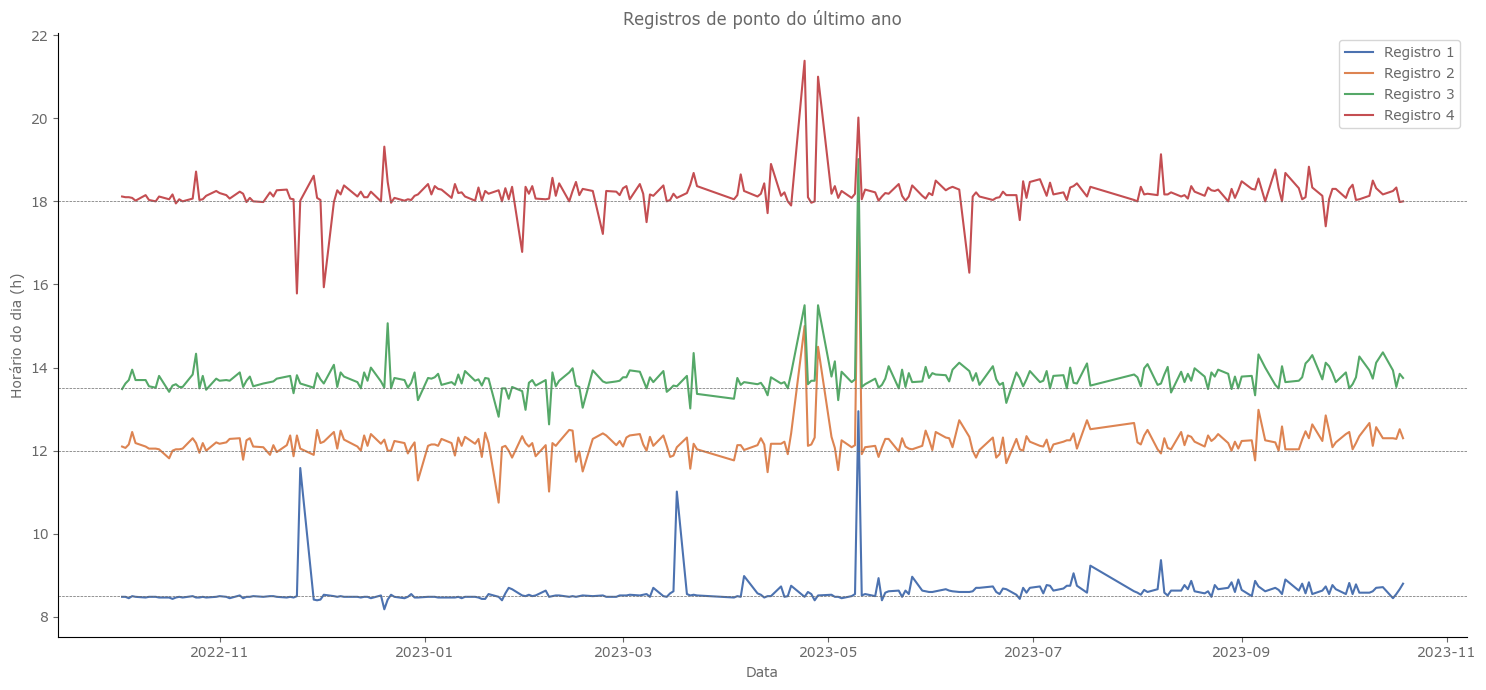

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

COLOR = "dimgrey"
plt.rcParams["text.color"] = COLOR
plt.rcParams["axes.labelcolor"] = COLOR
plt.rcParams["xtick.color"] = COLOR
plt.rcParams["ytick.color"] = COLOR
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Verdana"]
plt.rcParams["font.size"] = 10

sns.set_palette("deep")

plt.figure(figsize=(15, 7))
sns.lineplot(datahora_report, x="dia", y="ponto1", label="Registro 1")
sns.lineplot(datahora_report, x="dia", y="ponto2", label="Registro 2")
sns.lineplot(datahora_report, x="dia", y="ponto3", label="Registro 3")
sns.lineplot(datahora_report, x="dia", y="ponto4", label="Registro 4")

plt.xlabel("Data")
plt.ylabel("Horário do dia (h)")

plt.axhline(y=8.5, color="dimgrey", linewidth=0.5, linestyle="--")
plt.axhline(y=12, color="dimgrey", linewidth=0.5, linestyle="--")
plt.axhline(y=13.5, color="dimgrey", linewidth=0.5, linestyle="--")
plt.axhline(y=18, color="dimgrey", linewidth=0.5, linestyle="--")

plt.title("Registros de ponto do último ano")
# plt.text(x=.06, y=.96, s="Registros de ponto do último ano", ha="left", weight="bold")

sns.despine()

plt.legend()
plt.tight_layout()
plt.show()

In [23]:
datahora_report["tempo_manha"] = datahora_report["ponto2"] - datahora_report["ponto1"]
datahora_report["tempo_tarde"] = datahora_report["ponto4"] - datahora_report["ponto3"]
datahora_report["carga_horaria"] = (
    datahora_report["tempo_manha"] + datahora_report["tempo_tarde"]
)
datahora_report

,dia,ponto1,ponto2,ponto3,ponto4,tempo_manha,tempo_tarde,carga_horaria
0,2022-12-23,8.483333,12.233333,13.750000,18.083333,3.750000,4.333333,8.083333
1,2022-12-22,8.533333,12.000000,13.500000,17.966667,3.466667,4.466667,7.933333
2,2022-12-21,8.416667,12.000000,15.066667,18.466667,3.583333,3.400000,6.983333
3,2022-12-20,8.183333,12.266667,13.516667,19.316667,4.083333,5.800000,9.883333
4,2022-12-19,8.516667,12.166667,13.666667,18.000000,3.650000,4.333333,7.983333
...,...,...,...,...,...,...,...,...
246,2022-12-28,8.550000,12.083333,13.633333,18.033333,3.533333,4.400000,7.933333
247,2022-12-27,8.483333,11.933333,13.516667,18.050000,3.450000,4.533333,7.983333
248,2022-12-26,8.450000,12.183333,13.700000,18.016667,3.733333,4.316667,8.050000
50,2023-06-12,8.600000,12.333333,13.916667,16.283333,3.733333,2.366667,6.100000


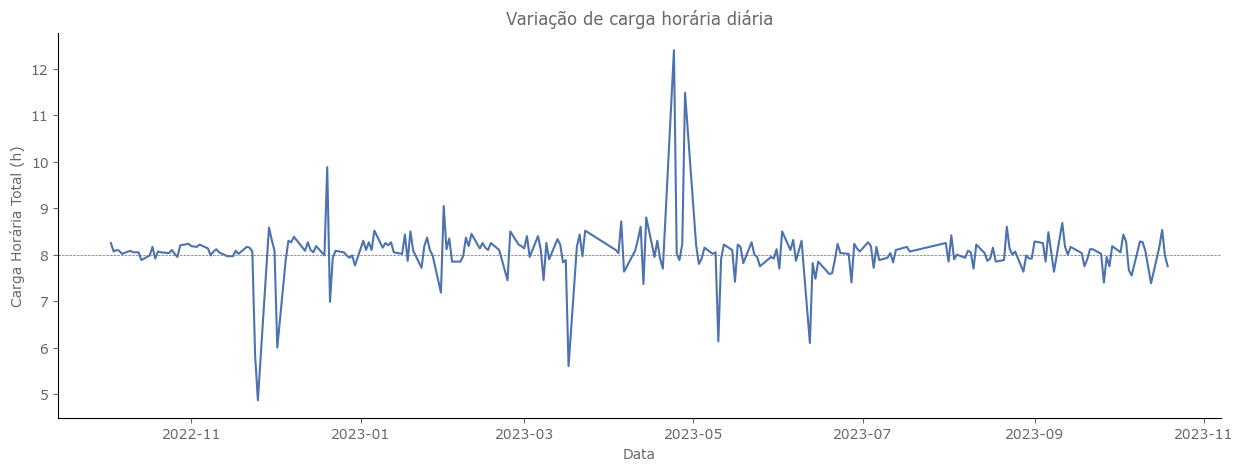

In [81]:
plt.figure(figsize=(15, 5))
sns.lineplot(datahora_report, x="dia", y="carga_horaria")
plt.axhline(y=8, color="dimgrey", linewidth=0.5, linestyle="--")

plt.xlabel("Data")
plt.ylabel("Carga Horária Total (h)")
plt.title("Variação de carga horária diária")

sns.despine()
plt.show()

In [25]:
datahora_report["carga_horaria"].mean()

8.043537414965988

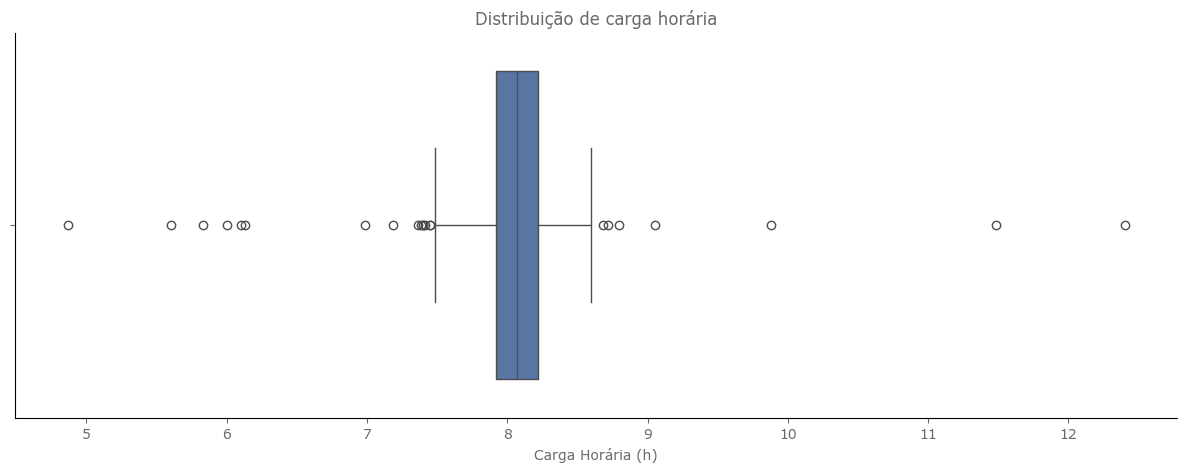

In [82]:
plt.figure(figsize=(15, 5))
sns.boxplot(datahora_report, x="carga_horaria")

plt.xlabel("Carga Horária (h)")
# plt.ylabel("Carga Horária Total")
plt.title("Distribuição de carga horária")

sns.despine()
plt.show()

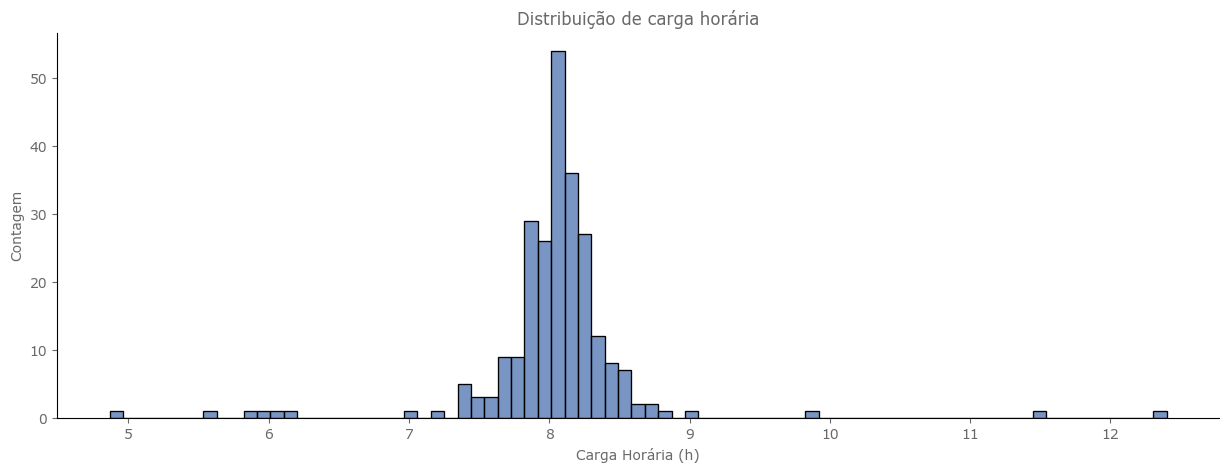

In [85]:
plt.figure(figsize=(15, 5))
sns.histplot(datahora_report, x="carga_horaria")

plt.xlabel("Carga Horária (h)")
plt.ylabel("Contagem")
plt.title("Distribuição de carga horária")

sns.despine()
plt.show()

In [27]:
datahora_report.query("carga_horaria > 9")

,dia,ponto1,ponto2,ponto3,ponto4,tempo_manha,tempo_tarde,carga_horaria
3,2022-12-20,8.183333,12.266667,13.516667,19.316667,4.083333,5.800000,9.883333
79,2023-04-28,8.516667,14.500000,15.500000,21.000000,5.983333,5.500000,11.483333
83,2023-04-24,8.483333,15.000000,15.500000,21.383333,6.516667,5.883333,12.400000
222,2023-01-31,8.500000,12.183333,12.983333,18.350000,3.683333,5.366667,9.050000


In [28]:
datahora_report["extra"] = datahora_report["carga_horaria"] - 8
datahora_report

,dia,ponto1,ponto2,ponto3,ponto4,tempo_manha,tempo_tarde,carga_horaria,extra
0,2022-12-23,8.483333,12.233333,13.750000,18.083333,3.750000,4.333333,8.083333,0.083333
1,2022-12-22,8.533333,12.000000,13.500000,17.966667,3.466667,4.466667,7.933333,-0.066667
2,2022-12-21,8.416667,12.000000,15.066667,18.466667,3.583333,3.400000,6.983333,-1.016667
3,2022-12-20,8.183333,12.266667,13.516667,19.316667,4.083333,5.800000,9.883333,1.883333
4,2022-12-19,8.516667,12.166667,13.666667,18.000000,3.650000,4.333333,7.983333,-0.016667
...,...,...,...,...,...,...,...,...,...
246,2022-12-28,8.550000,12.083333,13.633333,18.033333,3.533333,4.400000,7.933333,-0.066667
247,2022-12-27,8.483333,11.933333,13.516667,18.050000,3.450000,4.533333,7.983333,-0.016667
248,2022-12-26,8.450000,12.183333,13.700000,18.016667,3.733333,4.316667,8.050000,0.050000
50,2023-06-12,8.600000,12.333333,13.916667,16.283333,3.733333,2.366667,6.100000,-1.900000


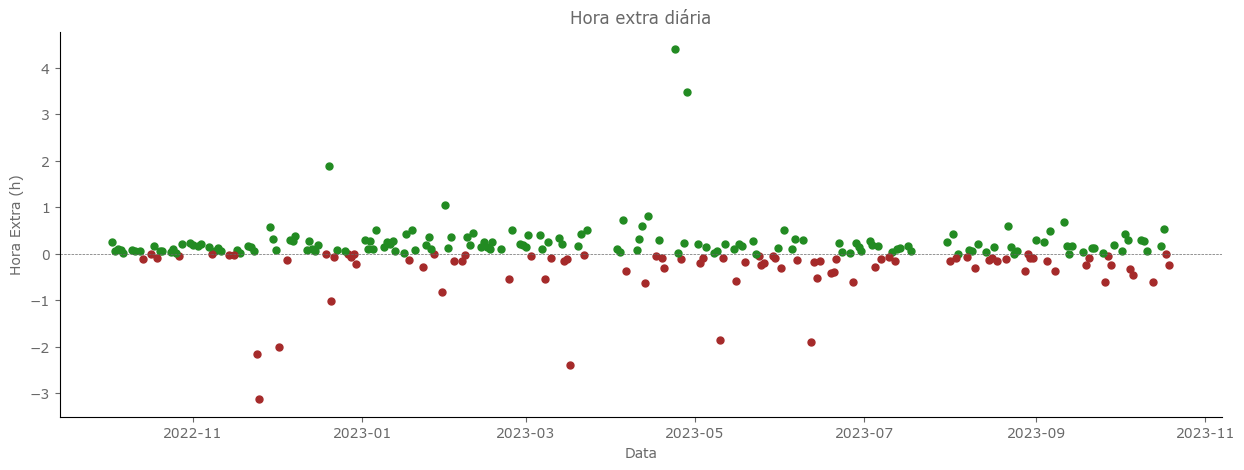

In [79]:

plt.figure(figsize=(15, 5))

for index, row in datahora_report.iterrows():
    cor = "forestgreen" if row["extra"] >= 0 else "brown"
    plt.plot(row["dia"], row["extra"], color=cor, marker="o", markersize=5)

plt.axhline(y=0, color="dimgrey", linewidth=0.5, linestyle="--")

plt.xlabel("Data")
plt.ylabel("Hora Extra (h)")
plt.title("Hora extra diária")

sns.despine()

plt.show()

In [101]:
print(len(datahora_report.query("extra < 0")))
print(len(datahora_report.query("extra >= 0")))
len(datahora_report.query("extra >= 0")) / len(datahora_report)

88
157


0.6408163265306123

In [31]:
print(datahora_report["extra"].min())
print(datahora_report["extra"].max())

-3.1333333333333346
4.4


In [32]:
datahora_report.describe()

,dia,ponto1,ponto2,ponto3,ponto4,tempo_manha,tempo_tarde,carga_horaria,extra
count,245,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,2023-04-09 02:44:34.285714176,8.611837,12.206463,13.746395,18.195306,3.594626,4.448912,8.043537,0.043537
min,2022-10-03 00:00:00,8.183333,10.750000,12.633333,15.783333,0.466667,1.000000,4.866667,-3.133333
25%,2023-01-03 00:00:00,8.483333,12.050000,13.566667,18.066667,3.466667,4.300000,7.916667,-0.083333
50%,2023-04-11 00:00:00,8.533333,12.166667,13.700000,18.166667,3.616667,4.466667,8.066667,0.066667
75%,2023-07-11 00:00:00,8.633333,12.300000,13.866667,18.300000,3.750000,4.650000,8.216667,0.216667
max,2023-10-19 00:00:00,12.950000,18.083333,19.016667,21.383333,6.516667,5.883333,12.400000,4.400000
std,NaN,0.396619,0.509444,0.452122,0.450945,0.456253,0.482479,0.585923,0.585923


/tmp/ipykernel_8568/19736839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


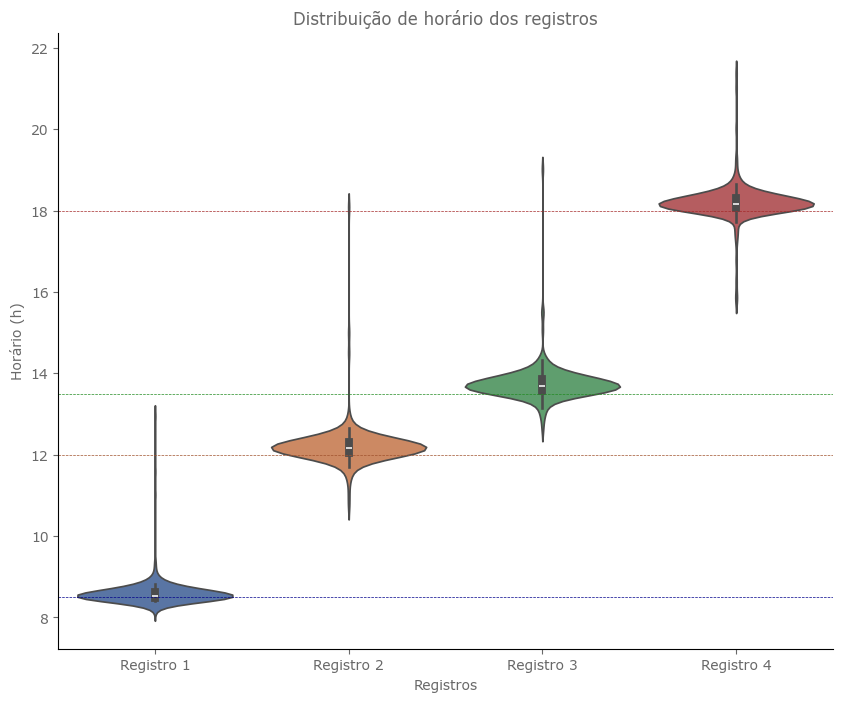

In [94]:
plt.figure(figsize=(10, 8))
sns.violinplot(
    x="variable",
    y="value",
    data=pd.melt(datahora_report[["ponto1", "ponto2", "ponto3", "ponto4"]]),
    palette="deep",
)
plt.axhline(y=8.5, color="darkblue", linewidth=0.5, linestyle="--")
plt.axhline(y=12, color="sienna", linewidth=0.5, linestyle="--")
plt.axhline(y=13.5, color="forestgreen", linewidth=0.5, linestyle="--")
plt.axhline(y=18, color="brown", linewidth=0.5, linestyle="--")


plt.xlabel("Registros")
plt.ylabel("Horário (h)")
plt.title("Distribuição de horário dos registros")
plt.xticks(["ponto1", "ponto2", "ponto3", "ponto4"], ["Registro 1", "Registro 2", "Registro 3", "Registro 4"])

sns.despine()


plt.show()

In [34]:
dias = datahora_report["dia"].tolist()
intervalo = pd.date_range(start=min(dias), end=max(dias), freq="B")

faltando = [dia for dia in intervalo if dia not in dias]
faltando

[Timestamp('2022-10-12 00:00:00'),
 Timestamp('2022-11-02 00:00:00'),
 Timestamp('2022-11-15 00:00:00'),
 Timestamp('2022-11-28 00:00:00'),
 Timestamp('2022-12-09 00:00:00'),
 Timestamp('2023-02-21 00:00:00'),
 Timestamp('2023-02-22 00:00:00'),
 Timestamp('2023-03-24 00:00:00'),
 Timestamp('2023-03-27 00:00:00'),
 Timestamp('2023-03-28 00:00:00'),
 Timestamp('2023-03-29 00:00:00'),
 Timestamp('2023-03-30 00:00:00'),
 Timestamp('2023-03-31 00:00:00'),
 Timestamp('2023-04-07 00:00:00'),
 Timestamp('2023-04-21 00:00:00'),
 Timestamp('2023-05-01 00:00:00'),
 Timestamp('2023-06-08 00:00:00'),
 Timestamp('2023-06-16 00:00:00'),
 Timestamp('2023-07-19 00:00:00'),
 Timestamp('2023-07-20 00:00:00'),
 Timestamp('2023-07-21 00:00:00'),
 Timestamp('2023-07-24 00:00:00'),
 Timestamp('2023-07-25 00:00:00'),
 Timestamp('2023-07-26 00:00:00'),
 Timestamp('2023-07-27 00:00:00'),
 Timestamp('2023-07-28 00:00:00'),
 Timestamp('2023-09-07 00:00:00'),
 Timestamp('2023-09-15 00:00:00'),
 Timestamp('2023-10-

In [35]:
import holidays

feriados = holidays.Brazil()
faltando_limpo = [dia for dia in faltando if dia not in feriados]
faltando_limpo

[Timestamp('2022-11-28 00:00:00'),
 Timestamp('2022-12-09 00:00:00'),
 Timestamp('2023-02-21 00:00:00'),
 Timestamp('2023-02-22 00:00:00'),
 Timestamp('2023-03-24 00:00:00'),
 Timestamp('2023-03-27 00:00:00'),
 Timestamp('2023-03-28 00:00:00'),
 Timestamp('2023-03-29 00:00:00'),
 Timestamp('2023-03-30 00:00:00'),
 Timestamp('2023-03-31 00:00:00'),
 Timestamp('2023-06-08 00:00:00'),
 Timestamp('2023-06-16 00:00:00'),
 Timestamp('2023-07-19 00:00:00'),
 Timestamp('2023-07-20 00:00:00'),
 Timestamp('2023-07-21 00:00:00'),
 Timestamp('2023-07-24 00:00:00'),
 Timestamp('2023-07-25 00:00:00'),
 Timestamp('2023-07-26 00:00:00'),
 Timestamp('2023-07-27 00:00:00'),
 Timestamp('2023-07-28 00:00:00'),
 Timestamp('2023-09-15 00:00:00')]

In [36]:
limpeza_anterior = pd.to_datetime(
    ["2022-12-09", "2022-11-28", "2023-10-20", "2023-02-22"]
)
casamento = pd.date_range(start="2023-03-24", end="2023-03-31")
ferias = pd.date_range(start="2023-07-19", end="2023-07-28")
day_off = pd.to_datetime(["2023-06-16"])
carnaval = pd.to_datetime(["2023-02-21"])
corpus_christi = pd.to_datetime(["2023-06-08"])
feriado_municipal = pd.to_datetime(["2023-09-15"])
excecoes = (
    limpeza_anterior.append(casamento)
    .append(ferias)
    .append(day_off)
    .append(carnaval)
    .append(corpus_christi)
    .append(feriado_municipal)
)

faltando_limpo = [dia for dia in faltando_limpo if dia not in excecoes]
faltando_limpo

[]